# Diploma work by Joonas Pekkanen

This Diploma work is created in Pythons Jupyter notebook. 

## Cars dataset

The dataset I chose for this project has information about different cars. This dataset contains 9 variables which are called : Car, MPG, Cylinders, Displacement, Horsepower, Weight, Acceleration, Model and Origin

7 of them are quantative(MPG, Cylinders, Displacement, Horsepower, Weight, Acceleration and Model)
2 of them are qualitative(Car and Origin)

### What this Notebook Shows

1. Downloading needed tools and my dataset
2. Data and variable description
3. Data munging
4. -

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import csv
from tpot import TPOTClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns

D:\Anaconda3\lib\site-packages\deap\tools\_hypervolume\pyhv.py:33: ImportWarning: Falling back to the python version of hypervolume module. Expect this to be very slow.
  "module. Expect this to be very slow.", ImportWarning)
D:\Anaconda3\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
D:\Anaconda3\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
D:\Anaconda3\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
D:\Anaconda3\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
D:\Anaconda3\lib\importlib\_bootstrap.py:219: ImportWarning: can't

Importing required libraries

In [6]:
cars = pd.read_csv("D:\cars.csv",
sep= '\;',
engine = 'python',
skiprows = 2,
names=["Car","MPG","Cylinders","Displacement","Horsepower","Weight","Acceleration","Model","Origin"])
cars.head(5)

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
0,Chevrolet Chevelle Malibu,18.0,8,307.0,130.0,3504.0,12.0,70,US
1,Buick Skylark 320,15.0,8,350.0,165.0,3693.0,11.5,70,US
2,Plymouth Satellite,18.0,8,318.0,150.0,3436.0,11.0,70,US
3,AMC Rebel SST,16.0,8,304.0,150.0,3433.0,12.0,70,US
4,Ford Torino,17.0,8,302.0,140.0,3449.0,10.5,70,US


This part of the code displays my dataset and makes it less messy. I skip row 2 because that displays the datatypes for each column and those dont belong among datasets car entries.

# Data and variable description

In [6]:
cars.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model
count,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000
mean,23.051232,5.475369,194.779557,103.529557,2979.413793,15.519704,75.921182
std,8.401777,1.712160,104.922458,40.520659,847.004328,2.803359,3.748737
min,0.000000,3.000000,68.000000,0.000000,1613.000000,8.000000,70.000000
25%,17.000000,4.000000,105.000000,75.000000,2226.500000,13.700000,73.000000
50%,22.350000,4.000000,151.000000,93.500000,2822.500000,15.500000,76.000000
75%,29.000000,8.000000,302.000000,129.000000,3618.250000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


Here all the variables are described. I am interested in Horsepowers impact on MPG (**Miles per Gallon**)
**1 mile = 1 609.344m** **1 gallon = 3.78541178 L**
We see that Horsepowers and MPGs mininum value is 0. That is because there are some missing values in dataset. I will list them so we can see which entries are incomplete.

In [16]:
cars.groupby('MPG').Horsepower.value_counts()

MPG   Horsepower
0.0   175.0         2
      48.0          1
      110.0         1
      115.0         1
      140.0         1
      153.0         1
      165.0         1
9.0   193.0         1
10.0  200.0         1
      215.0         1
11.0  150.0         1
      180.0         1
      208.0         1
      210.0         1
12.0  180.0         2
      160.0         1
      167.0         1
      198.0         1
      225.0         1
13.0  150.0         4
      175.0         3
      130.0         2
      145.0         2
      170.0         2
      129.0         1
      140.0         1
      155.0         1
      158.0         1
      165.0         1
      190.0         1
                   ..
36.0  70.0          1
      74.0          1
      75.0          1
      84.0          1
      88.0          1
36.1  60.0          1
      66.0          1
36.4  67.0          1
37.0  65.0          1
      68.0          1
      92.0          1
37.2  65.0          1
37.3  69.0          1
37.7  62.0     

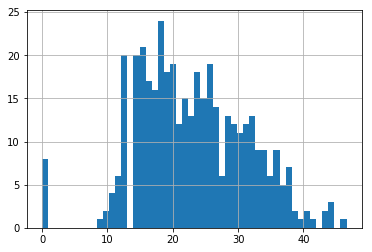

In [51]:
cars['MPG'].hist(bins=50)

Here we can see a histogram of datasets MPGs. By looking at the picture we can easily spot few extreme values.  Next I will display Horsepowers distribution using boxplot.

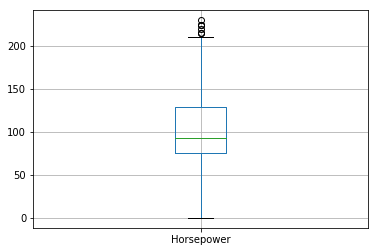

In [44]:
cars.boxplot(column='Horsepower')

Boxplot also shows couple of extreme values above 200.

Text(336.971,0.5,'(MPG) Miles per gallon')

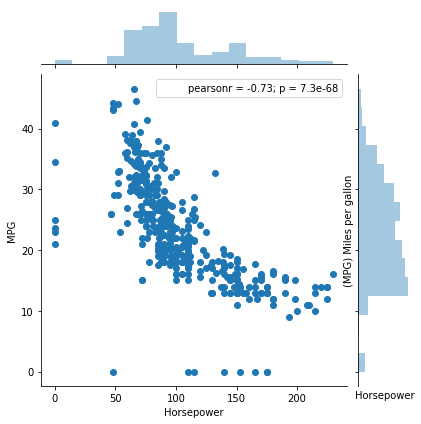

In [7]:
sns.jointplot(x='Horsepower', y='MPG', data=cars)
plt.xlabel('Horsepower')
plt.ylabel('(MPG) Miles per gallon')

From this jointplot chart we can see that in most cases more horsepower means less MPG. Optimal Horsepower is about 63HP

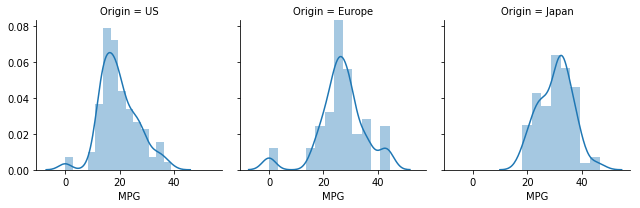

In [8]:
FG = sns.FacetGrid(cars, col="Origin") 
FG.map(sns.distplot, 'MPG')


Interesting thing was to compare MPG between cars from different origins. US and Europe cars have much higher peak on MPG.

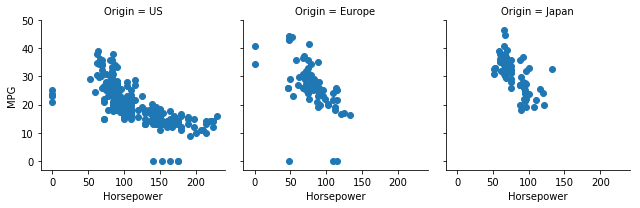

In [37]:
FG = sns.FacetGrid(cars, col="Origin") 
FG.map(plt.scatter, "Horsepower", "MPG")

This is the same chart as above, but now horsepower is added. In this dataset US cars are most powerful in terms of horsepower but cant reach as high MPG as Europe and Japan.

# Data munging

In [76]:
cars.rename(columns={'MPG': 'class'}, inplace=True) # Renaming the target zone

In [59]:
cars.dtypes

Car              object
MPG             float64
Cylinders         int64
Displacement    float64
Horsepower      float64
Weight          float64
Acceleration    float64
Model             int64
Origin           object
dtype: object

Confirming datatypes and proceeding to check number of items in 2 categorical variables

In [9]:
for cat in ['Car', 'Origin']:
    print("Number of Items in category '{0}': \b {1:2.2f} ".format(cat, cars[cat].unique().size))

Number of Items in category 'Car': 308.00 
Number of Items in category 'Origin': 3.00 


Origin has only 3 items so we can check them also

In [10]:
for cat in ['Origin']:
    print("Items for category '{0}': {1}".format(cat, cars[cat].unique()))

Items for category 'Origin': ['US' 'Europe' 'Japan']


Then we will turn these items to numeric and replace nulls for entire dataset

In [68]:
cars['Origin'] = cars['Origin'].map({'US':0,'Europe':1,'Japan':2})

In [66]:
cars = cars.fillna(-999)
pd.isnull(cars).any()

Car             False
MPG             False
Cylinders       False
Displacement    False
Horsepower      False
Weight          False
Acceleration    False
Model           False
Origin          False
dtype: bool

Like in Titanic dataset we encode the car variable as digits using Scikit-learn's MultiLabelBinarizer and treat them as new features.

In [69]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
carNew = mlb.fit_transform([{str(val)} for val in cars['Car'].values])

In [70]:
carNew

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

Now we can drop the unused part off

In [71]:
cars_new = cars.drop(['Car'], axis=1)

In [72]:
assert (len(cars['Car'].unique()) == len(mlb.classes_)), "Not Equal" #check correct encoding done

After this we will add encoded features to form the final dataset to be used with TPOT.

In [73]:
cars_new = np.hstack((cars_new.values,carNew))

In [74]:
np.isnan(cars_new).any()

False

In [75]:
cars_new[0].size

316

Like in Titanic tutorial we store the class labels, which we need to predict, in a separate variable.

In [77]:
cars_class = cars['class'].values

# Tpot Classifier

In [83]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

digits = load_digits()
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target,
                                                    train_size=0.75, test_size=0.25)

tpot = TPOTClassifier(generations=5, population_size=20, verbosity=2)
tpot.fit(X_train, y_train)
print(tpot.score(X_test, y_test))
tpot.export('tpot_mnist_pipeline.py')

Generation 1 - Current best internal CV score: 0.9636148371448124


Generation 2 - Current best internal CV score: 0.9636591499834498


Generation 3 - Current best internal CV score: 0.9673603633218788


Generation 4 - Current best internal CV score: 0.9681343957813044


Generation 5 - Current best internal CV score: 0.9681343957813044



Best pipeline: LogisticRegression(KNeighborsClassifier(StandardScaler(input_matrix), n_neighbors=44, p=1, weights=uniform), C=15.0, dual=False, penalty=l2)
0.98


True

In [11]:
from sklearn.neighbors import KNeighborsClassifier

features = cars.drop('class', axis=1).values
training_features, testing_features, training_target, testing_target = \
            train_test_split(features, cars['class'].values, random_state=42)


exported_pipeline = KNeighborsClassifier(n_neighbors=6, weights="distance")

exported_pipeline.fit(training_features, cars_class)
results = exported_pipeline.predict(testing_features)

D:\Anaconda3\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


ValueError: labels ['class'] not contained in axis